In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from two_class_density_scatterplot import density_and_class_ratio, polar_colormap

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
df = pd.read_csv('./data/sample_data.csv')
y = np.array(df['label'])
X = np.array(df[['x_pos', 'y_pos']])

In [3]:
# compute density and class 1 ratio
density, class1_ratio = density_and_class_ratio(X, y)
# polar colormap
pcmap = polar_colormap

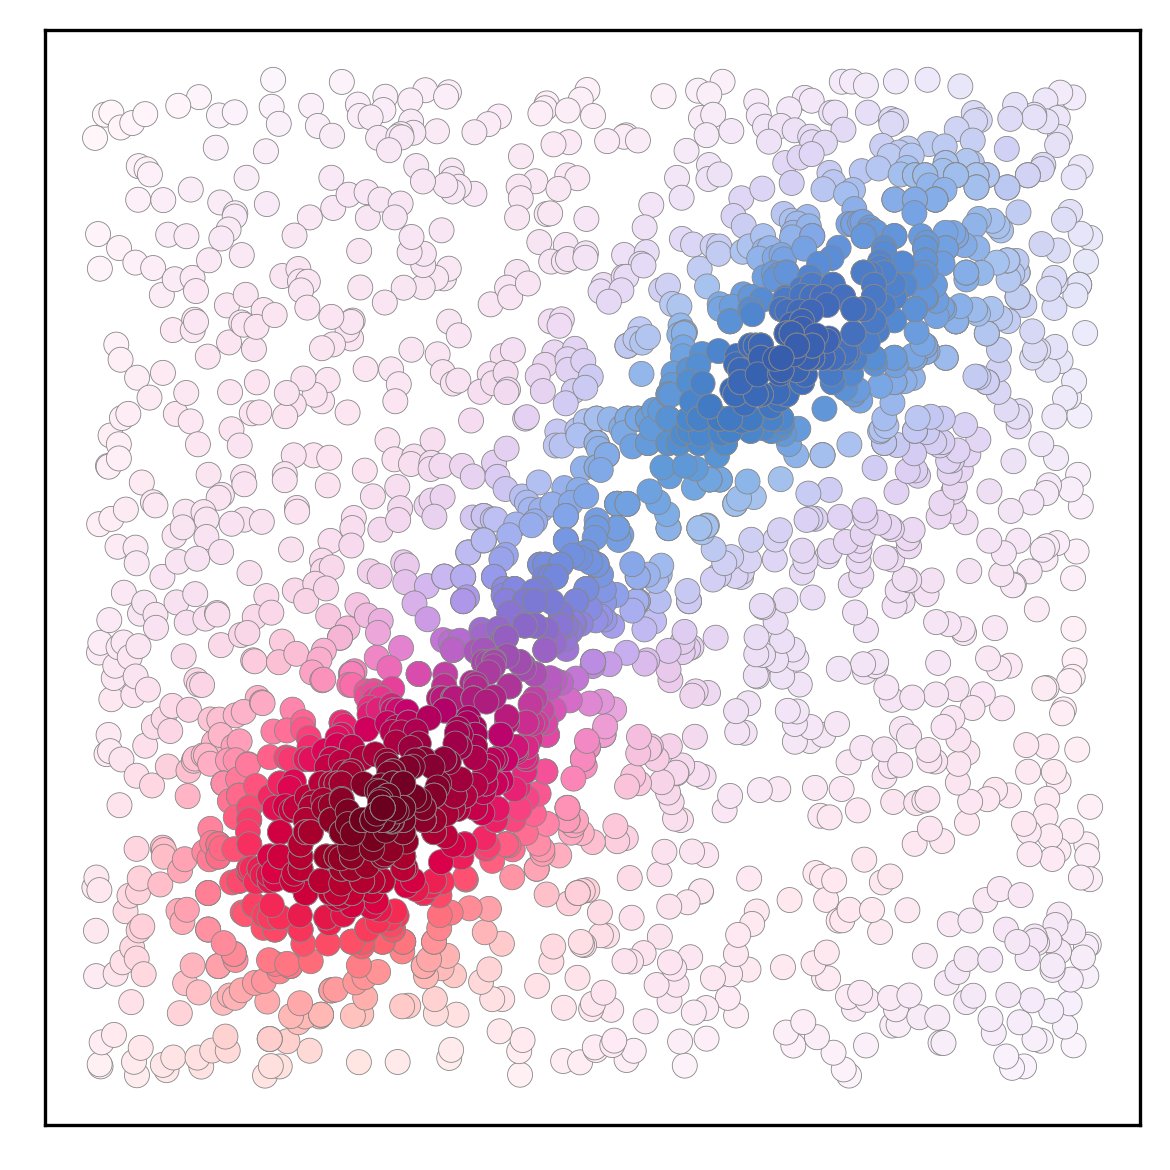

In [4]:
# plot two-class density plot
colors = np.array([
    pcmap(radius, ratio1) for radius, ratio1 in zip(density, class1_ratio)
])
order = np.argsort(density) # order by density

plt.figure(figsize=(4, 4))

plt.scatter(X[order, 0],
            X[order, 1],
            c=colors[order],
            edgecolors='#888888',
            lw=0.2)

plt.xticks([])
plt.yticks([])
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()

plt.show()

/var/folders/bn/ck0phlxn3ln6ksyrj4kgtsn40000gn/T/ipykernel_64085/907159680.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='polar')


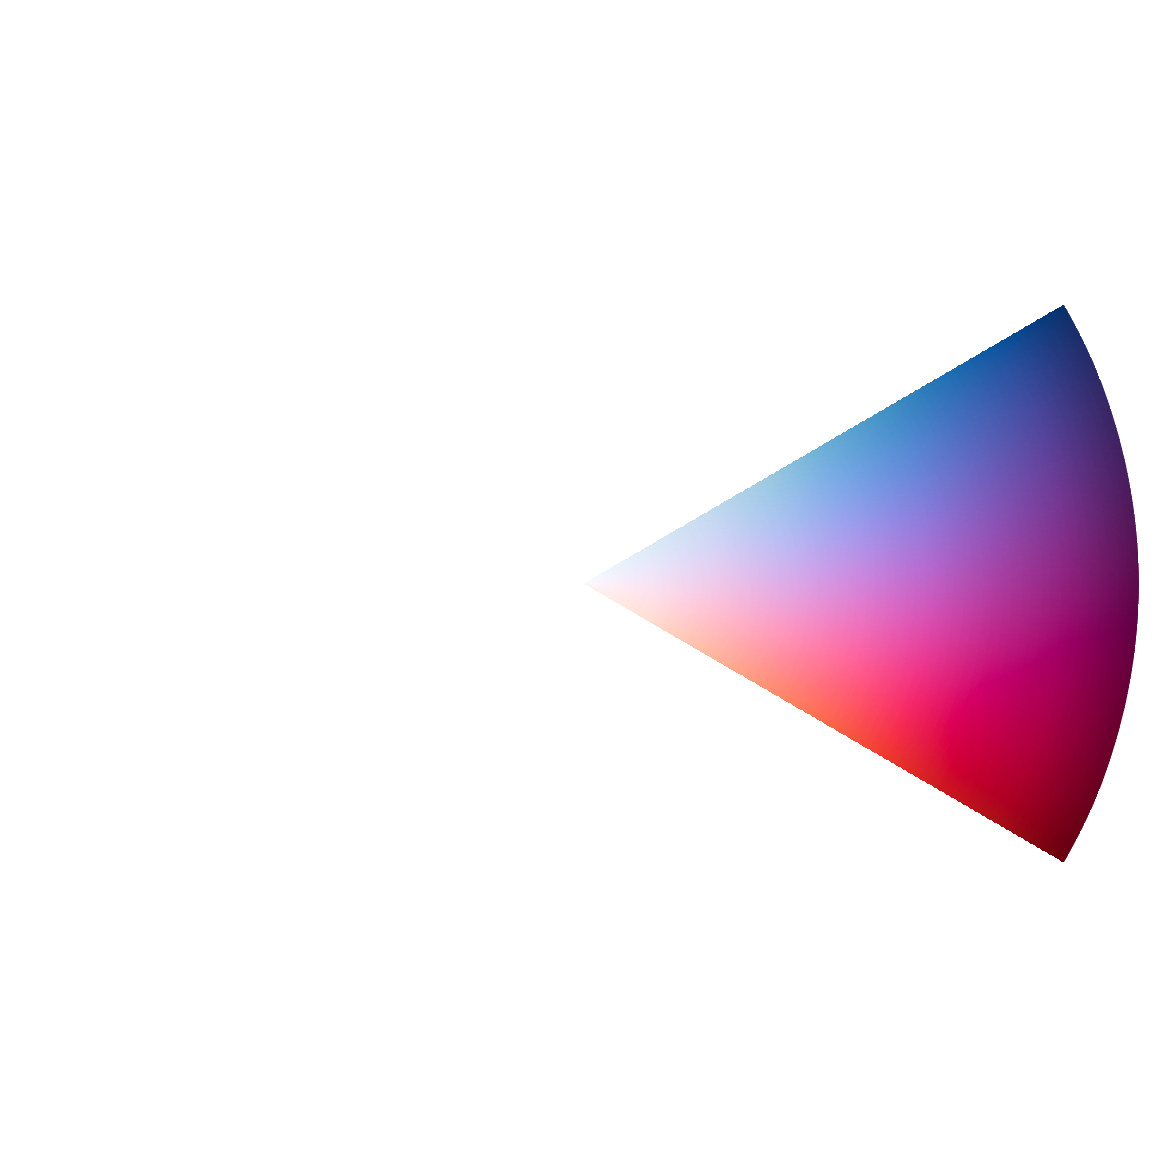

In [5]:
# Plot polar colormap legend
from matplotlib.colors import ListedColormap

n = 200
angle = 60

fig, _ = plt.subplots(1, 1)
c_density, c_ratio = np.meshgrid(np.linspace(0, 1, n),
                                    np.linspace(0, 1, n))
theta = c_ratio * (angle / 180) * np.pi - (angle / 360) * np.pi

# make 1D colormap used to map location to a polar colormap
cmap_colors = []
for i in range(n):
    for j in range(n):
        cmap_colors.append(pcmap(c_density[i, j], c_ratio[i, j]))
newcmp = ListedColormap(cmap_colors)

z = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        z[i, j] = n * i + j

ax = plt.subplot(projection='polar')
ax.grid(False)
plt.pcolormesh(theta, c_density, z, cmap=newcmp, shading='auto')
plt.xticks([])
plt.yticks([])
ax.axis('off')

plt.show()